In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn import metrics
from statsmodels.tsa.ar_model import AutoReg
from numpy import sqrt
from sklearn.metrics import mean_squared_error

In [193]:
superstore_data = pd.read_csv("/Users/theranmeadows/Desktop/Bellevue University/dsc630predictiveAnalytics/project/superstore - data - superstore - superstore.csv")
superstore_data.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,2,Order.Date,Order.ID,...,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum,Month
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,00:00.0,CA-2011-130813,...,Consumer,00:00.0,Second Class,4.37,California,Paper,2011,North America,2,January
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,00:00.0,CA-2011-148614,...,Consumer,00:00.0,Standard Class,0.94,California,Paper,2011,North America,4,January
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,00:00.0,CA-2011-118962,...,Consumer,00:00.0,Standard Class,1.81,California,Paper,2011,North America,32,July
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,00:00.0,CA-2011-118962,...,Consumer,00:00.0,Standard Class,4.59,California,Paper,2011,North America,32,July
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,00:00.0,CA-2011-146969,...,Consumer,00:00.0,Standard Class,1.32,California,Paper,2011,North America,40,September


In [194]:
# Keep the columns I will use for this project
superstore_data = superstore_data[['Category', 'Profit', 'Year', 'Month']]
superstore_data.head()

,Category,Profit,Year,Month
0,Office Supplies,9.3312,2011,January
1,Office Supplies,9.2928,2011,January
2,Office Supplies,9.8418,2011,July
3,Office Supplies,53.2608,2011,July
4,Office Supplies,3.1104,2011,September


In [195]:
# check for null values
superstore_data.isnull().sum()

Category    0
Profit      0
Year        0
Month       0
dtype: int64

In [196]:
# showing the 'Profit' column in 1000s

superstore_data['Profit'] = superstore_data['Profit'] * 1000

In [197]:
# Assign number to the month names
superstore_data['Month'] = superstore_data['Month'].map({'January': 1,
                                                         'February': 2,
                                                         'March': 3,
                                                         'April': 4,
                                                         'May':5,
                                                         'June':6,
                                                         'July':7,
                                                         'August':8,
                                                         'September':9,
                                                         'October':10,
                                                         'November':11,
                                                         'December':12})

In [198]:
# Create a Date column that combines "Year" and "Month" columns.
superstore_data['Date']=pd.to_datetime(superstore_data[['Year','Month']].assign(DAY = 1))

In [199]:
# Preview the data so far
superstore_data.head()

,Category,Profit,Year,Month,Date
0,Office Supplies,9331.2,2011,1,2011-01-01
1,Office Supplies,9292.8,2011,1,2011-01-01
2,Office Supplies,9841.8,2011,7,2011-07-01
3,Office Supplies,53260.8,2011,7,2011-07-01
4,Office Supplies,3110.4,2011,9,2011-09-01


In [200]:
# check for null values
superstore_data.isnull().sum()

Category    0
Profit      0
Year        0
Month       0
Date        0
dtype: int64

In [201]:
# Clean the data up

superstore_data_clean = superstore_data[['Date','Profit']].sort_values('Date')
superstore_data_clean = superstore_data_clean.dropna()
superstore_timeindex = pd.DatetimeIndex(superstore_data_clean['Date'].values)
superstore_data_clean = superstore_data_clean.set_index(superstore_timeindex)
superstore_data_clean.drop('Date', axis = 1, inplace = True)

In [202]:
superstore_data_clean.head()

,Profit
2011-01-01,9331.2
2011-01-01,52634.4
2011-01-01,30781.8
2011-01-01,4471.2
2011-01-01,21295.4


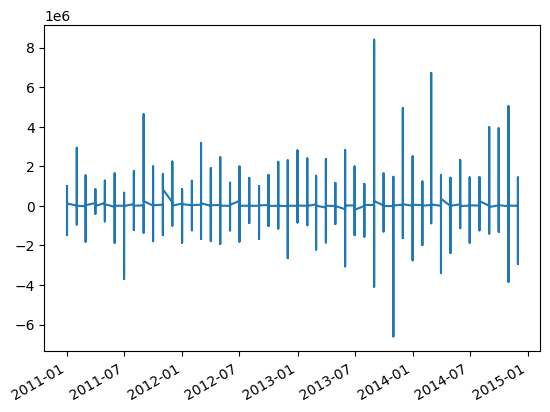

In [203]:
superstore_data_clean.Profit.plot.line()
plt.show()

In [204]:
# spliting the data into test and train

train_df= superstore_data_clean[superstore_data_clean.index < '2012']
test_df = superstore_data_clean[superstore_data_clean.index >= '2013']

In [205]:
# Building a predictive time model

time_model = AutoReg(train_df, lags=5).fit()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [206]:
time_predictions = time_model.predict(start = len(train_df), end = (len(superstore_data_clean)-1),dynamic = False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


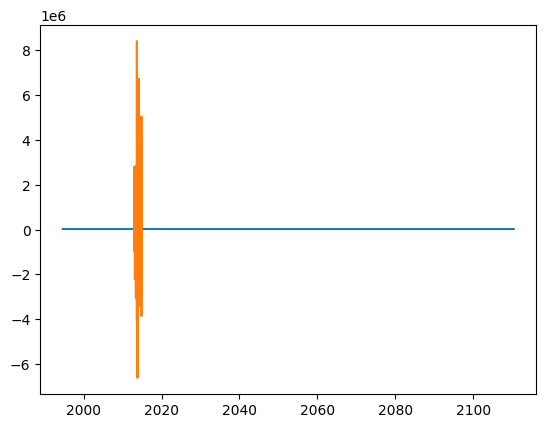

In [207]:
plt.plot(time_predictions)
plt.plot(test_df)

In [208]:
rmse = sqrt(mean_squared_error(test_df, time_predictions))
print('Test RMSE: %.3f' % rmse)

ValueError: Found input variables with inconsistent numbers of samples: [31330, 42292]